<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_2_2_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Columns: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 447710035968.0000 - mae: 548144.3125 - val_loss: 405815230464.0000 - val_mae: 535961.8750
Epoch 2/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 425051783168.0000 - mae: 532716.1250 - val_loss: 379658993664.0000 - val_mae: 513693.9688
Epoch 3/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 390107299840.0000 - mae: 505051.3125 - val_loss: 321178173440.0000 - val_mae: 460228.8438
Epoch 4/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 332131074048.0000 - mae: 446300.5000 - val_loss: 241729896448.0000 - val_mae: 375192.5625
Epoch 5/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 244974043136.0000 - mae: 355867.8438 - val_loss: 165195251712.0000 - val_mae: 274398.0000
Epoch 6/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 170265067520.0000 - mae: 262155.0000 - val_loss: 113417666560.0000 - val_mae: 208569.7812
Epoch 7/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133378359296.0000 - mae: 211853.9219 - val_lo

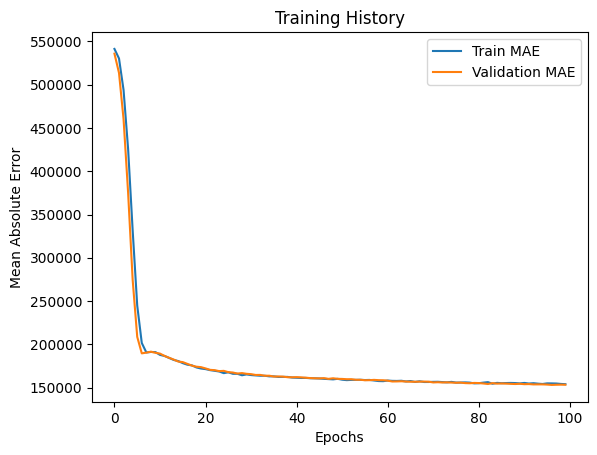

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "/mnt/data/08_kc_house_data.csv"  # Adjusted to your uploaded file
housing_data = pd.read_csv("/content/08_kc_house_data.csv")

# Display column names to verify
print("Dataset Columns:", housing_data.columns)

# Step 3: Define numeric and categorical columns based on correct dataset columns
numeric_features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot']
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Split features and target variable
X = housing_data[numeric_features + categorical_features]  # Selecting only relevant features
y = housing_data['price']  # Target variable

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numeric data
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical data
    ])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Step 5: Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_transformed, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test_transformed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()
